In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\kushp\OneDrive\Desktop\Fraud detection system\Fraud.csv")

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [10]:
data['isFlaggedFraud']

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

In [11]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


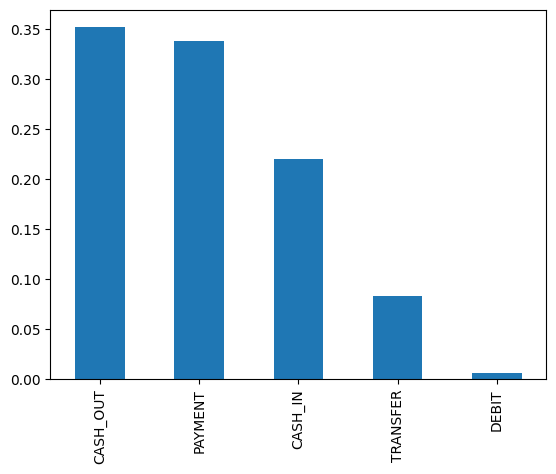

In [14]:
data['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

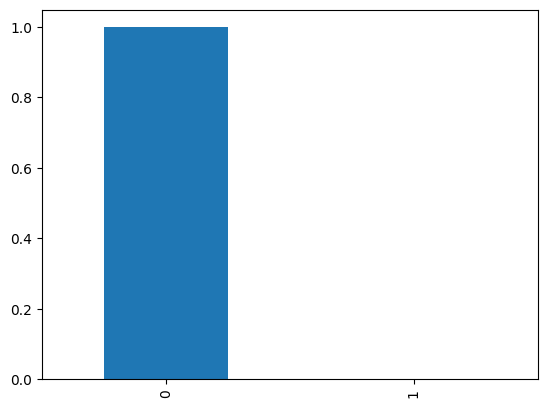

In [15]:
data['isFraud'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [16]:
new_data = data.drop(['isFlaggedFraud','nameOrig','nameDest'],axis=1)

In [17]:
new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [18]:
new_data.shape

(6362620, 8)

In [19]:
dmap = {'PAYMENT':1,'CASH_OUT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5}

In [20]:
new_data['type'] = new_data['type'].map(dmap)
new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,2,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [21]:
new_data['type'].value_counts()

2    2237500
1    2151495
3    1399284
4     532909
5      41432
Name: type, dtype: int64

In [22]:
new_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot: ylabel='Frequency'>

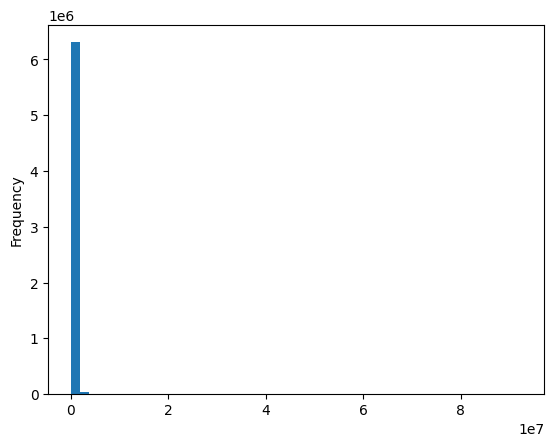

In [23]:
new_data['amount'].plot(kind='hist',bins=50)

<Figure size 1200x1000 with 0 Axes>

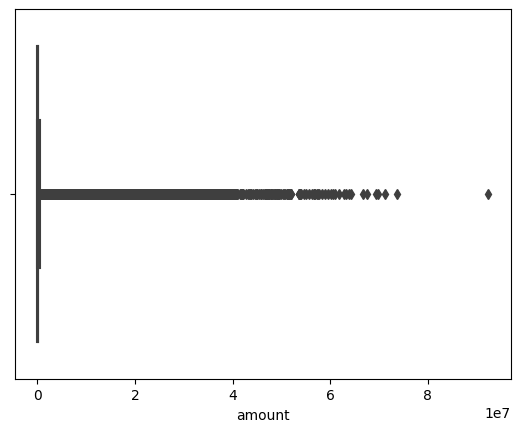

<Figure size 1200x1000 with 0 Axes>

In [24]:
sns.boxplot(x='amount',data=new_data)
plt.figure(figsize=(12,10))

<AxesSubplot: ylabel='Frequency'>

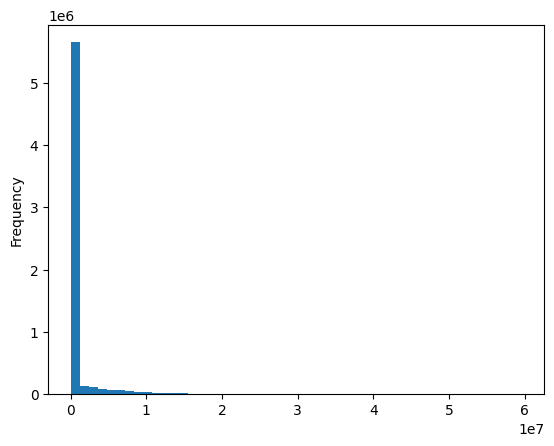

In [25]:
new_data['oldbalanceOrg'].plot(kind='hist',bins=50)

<AxesSubplot: xlabel='oldbalanceOrg'>

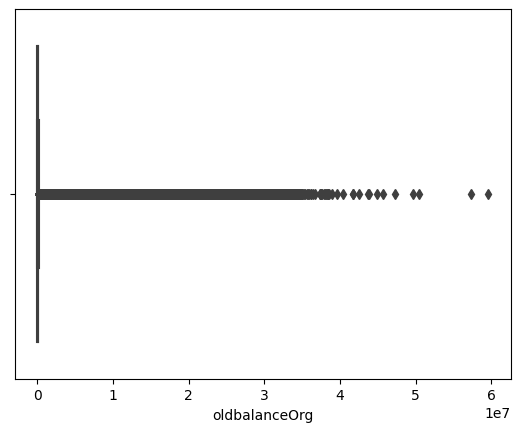

In [26]:
sns.boxplot(x='oldbalanceOrg',data=new_data)

<AxesSubplot: xlabel='newbalanceOrig'>

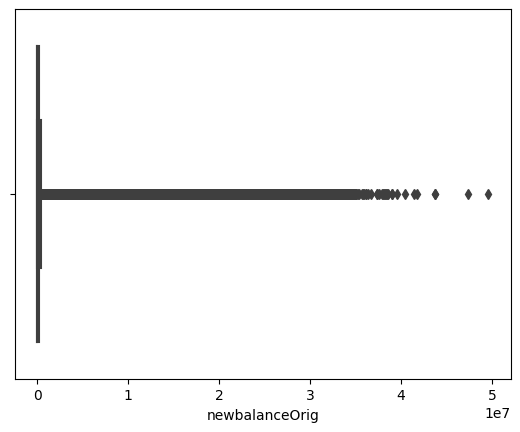

In [27]:
sns.boxplot(x='newbalanceOrig',data=new_data)

<AxesSubplot: xlabel='oldbalanceDest'>

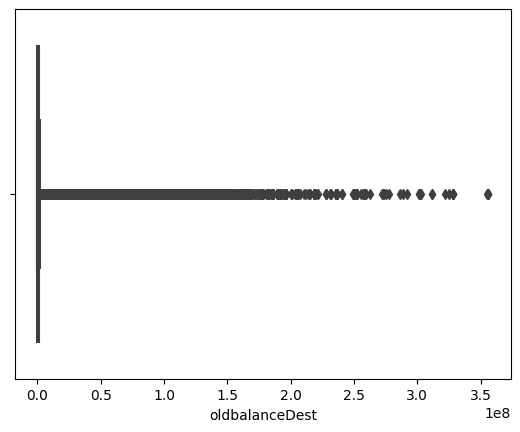

In [28]:
sns.boxplot(x='oldbalanceDest',data=new_data)

<AxesSubplot: xlabel='newbalanceDest'>

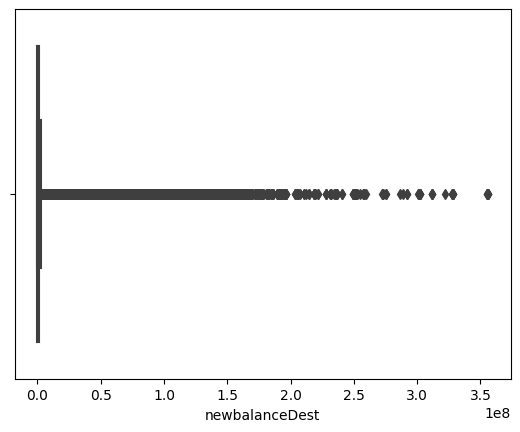

In [29]:
sns.boxplot(x='newbalanceDest',data=new_data)

In [30]:
X = new_data.drop(['isFraud'],axis=1)
y = new_data['isFraud']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
predict = logmodel.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
print(classification_report(predict,y_test))
print("Logistic Regression classification report")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541421
           1       0.41      0.37      0.39      3627

    accuracy                           1.00   2545048
   macro avg       0.71      0.68      0.69   2545048
weighted avg       1.00      1.00      1.00   2545048

Logistic Regression classification report


In [38]:
confusion_matrix(y_test,predict)

array([[2539525,    2295],
       [   1896,    1332]], dtype=int64)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_gini = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [63]:
tree_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [64]:
tree_predict = tree_gini.predict(X_test)

In [65]:
tree_gini.score(X_test,y_test)

0.999143434622844

In [66]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541820
           1       0.65      0.69      0.67      3228

    accuracy                           1.00   2545048
   macro avg       0.83      0.84      0.84   2545048
weighted avg       1.00      1.00      1.00   2545048



[Text(0.5, 0.875, 'x[2] <= 600715.812\nentropy = 0.014\nsamples = 3817572\nvalue = [3812587, 4985]'),
 Text(0.25, 0.625, 'x[1] <= 3.5\nentropy = 0.009\nsamples = 3667363\nvalue = [3664567, 2796]'),
 Text(0.125, 0.375, 'x[4] <= 0.09\nentropy = 0.005\nsamples = 3457425\nvalue = [3456022, 1403]'),
 Text(0.0625, 0.125, 'entropy = 0.009\nsamples = 1840511\nvalue = [1839109, 1402]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 1616914\nvalue = [1616913, 1]'),
 Text(0.375, 0.375, 'x[6] <= 45.005\nentropy = 0.058\nsamples = 209938\nvalue = [208545, 1393]'),
 Text(0.3125, 0.125, 'entropy = 0.948\nsamples = 2184\nvalue = [801, 1383]'),
 Text(0.4375, 0.125, 'entropy = 0.001\nsamples = 207754\nvalue = [207744, 10]'),
 Text(0.75, 0.625, 'x[3] <= 600694.062\nentropy = 0.11\nsamples = 150209\nvalue = [148020, 2189]'),
 Text(0.625, 0.375, 'x[0] <= 11.5\nentropy = 0.0\nsamples = 144418\nvalue = [144417, 1]'),
 Text(0.5625, 0.125, 'entropy = 0.003\nsamples = 4309\nvalue = [4308, 1]'),
 Text(0.6875, 0

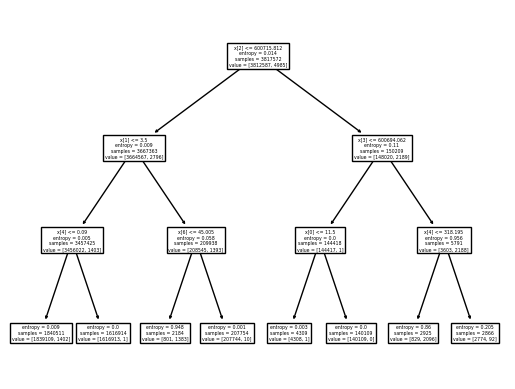

In [73]:
tree.plot_tree(tree_gini)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
pred = knn.predict(X_test)

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541820
           1       0.87      0.68      0.76      3228

    accuracy                           1.00   2545048
   macro avg       0.93      0.84      0.88   2545048
weighted avg       1.00      1.00      1.00   2545048



In [86]:
print("logistic regression accuracy",accuracy_score(y_test,predict))
print("decision tree accuracy",accuracy_score(y_test,tree_predict))
print("K Nearest Neighbour accuracy",accuracy_score(y_test,pred))

logistic regression accuracy 0.9983532727084126
decision tree accuracy 0.999143434622844
K Nearest Neighbour accuracy 0.9994628784997376


This is a fraud detection system using logistic regression , decision trees and knn algorithm. These models were used as this is a classification model which predicts if the transaction in the X part of the datasetis fraud or not and tests it with the Y part of the dataset. 

First, I imported the dataset and performed some preprocessing steps on it such as describe(), info(),dtypes,column names.The isnull().sum() method checks whether there are any empty or missing values in the dataset, returns 0 if there are no missing values in a column. This dataset does not have any missing values. 

Before in depth cleaning of the dataset,I removed all the string columns - "nameOrig" and "nameDest" in the dataset which were of no use in prediction of fraud transaction. Next, I removed the isflaggedfraud columns from the dataset as this column had error values present ,these error were more than 50% of the whole column. Hence, we dropped this column to increase the accuracy of our model.

For the outliers, the boxplot graph was used to understand the outliers in the dataset.As observed, there are very little to none outliers in the dataset which will not affect the accuracy and the prediction of the dataset.

Description :-
This is a classification model where the transaction is classified and predicted as 0 or 1. 0 represents that the transaction is not a fraud and 1 represents that the transaction is a fraud.To predict this, the dataset is cleaned and split into X_train , X_test, y_train and y_test using the train test split method. The machine learning model is then trained on the X_train and y_train part of data.After training, the model is tested on the X_test dataset to calculate the predictions of that data. These predictions are then compared with Y_test data to calculate the precision, accuracy and the F1 score.


The performance of each of the machine learning model is the classification report and confusion_matrix from sklearn.metrics. This helps in identifying various insights about the accuracy of the model and the prediction of the model.With this,we can identify which model is performing the best and choose it for future predictions on new or unseen data.

The key factors to identifying whether the transaction is fraud or not is basically unusual patterns of transaction.From this dataset it is observed that when there is no amount of money left in the new balance original column of the dataset i.e when the the value inside that column is 0.00, then that transaction should be classified as a Fraud. This observation was helpful for the models as that was the  most important column in the dataset which would help in accurate prediction on new data.

This model should be used in banks or financial companies to identify fraud transactions and alert the user about the same. This model would help in prevention of fraud transactions. Along with this, the company should also check on the transaction history or the destination at which the amount is transferred and a unique key should be given to the user for their respective identification which would further increase the security of transaction. 
